In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train=x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [7]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()  # Flatten the 28x28 images into a 1D array
        self.fc1 = nn.Linear(28*28, 30)  # First hidden layer with 30 neurons
        self.fc2 = nn.Linear(30, 20)      # Second hidden layer with 20 neurons
        self.fc3 = nn.Linear(20, 10)      # Output layer with 10 neurons

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))  # ReLU activation for the first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation for the second hidden layer
        x = F.softmax(self.fc3(x), dim=1)  # Softmax activation for the output layer
        return x

# Create an instance of the network
model = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy loss
optimizer = optim.Adam(model.parameters())  # Adam optimizer

# Model summary
print(model)


Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)


In [8]:
# Assuming x_train, y_train, x_test, y_test are Torch tensors or datasets

# Define the number of epochs and batch size
epochs = 5
batch_size = 100

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Define a function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    accuracy = correct / labels.size(0)
    return accuracy

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    running_accuracy = 0.0

    # Training phase
    model.train()
    for i in range(0, len(x_train), batch_size):
        inputs = x_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_accuracy += calculate_accuracy(outputs, labels) * inputs.size(0)

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test)
        val_loss = criterion(val_outputs, y_test)
        val_accuracy = calculate_accuracy(val_outputs, y_test)

    # Print statistics
    epoch_loss = running_loss / len(x_train)
    epoch_accuracy = running_accuracy / len(x_train)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/5, Loss: 1.7925, Accuracy: 0.7049, Validation Loss: 1.6693, Validation Accuracy: 0.8084
Epoch 2/5, Loss: 1.6406, Accuracy: 0.8292, Validation Loss: 1.6271, Validation Accuracy: 0.8383
Epoch 3/5, Loss: 1.6229, Accuracy: 0.8425, Validation Loss: 1.6162, Validation Accuracy: 0.8476
Epoch 4/5, Loss: 1.6146, Accuracy: 0.8497, Validation Loss: 1.6110, Validation Accuracy: 0.8534
Epoch 5/5, Loss: 1.6087, Accuracy: 0.8551, Validation Loss: 1.6068, Validation Accuracy: 0.8563


In [9]:
# Set the model to evaluation mode
model.eval()

# Forward pass through the test data
with torch.no_grad():
    test_outputs = model(x_test)
    test_loss = criterion(test_outputs, y_test)

# Calculate accuracy
test_accuracy = calculate_accuracy(test_outputs, y_test)

# Print test accuracy
print(f'Test accuracy: {test_accuracy:.4f}')


Test accuracy: 0.8563


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

x_train_sk = x_train.reshape(-1, 28*28)
x_test_sk = x_test.reshape(-1, 28*28)
x_train_sk, x_test_sk = x_train_sk / 255.0, x_test_sk / 255.0

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_sk, y_train)
rf_pred = rf_model.predict(x_test_sk)
rf_report = classification_report(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)



In [11]:
print("Random Forest Model Metrics:")
print(rf_report)
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest Model Metrics:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    

In [12]:
# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train_sk, y_train)  # Fitting the logistic regression model
logreg_pred = logreg_model.predict(x_test_sk)
logreg_report = classification_report(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [13]:
print("\nLogistic Regression Model Metrics:")
print(logreg_report)
print("Confusion Matrix:")
print(logreg_conf_matrix)


Logistic Regression Model Metrics:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       980
           1       0.61      0.99      0.75      1135
           2       0.90      0.70      0.78      1032
           3       0.67      0.86      0.75      1010
           4       0.84      0.84      0.84       982
           5       0.96      0.30      0.45       892
           6       0.85      0.88      0.87       958
           7       0.77      0.87      0.82      1028
           8       0.89      0.64      0.74       974
           9       0.86      0.69      0.77      1009

    accuracy                           0.78     10000
   macro avg       0.82      0.77      0.77     10000
weighted avg       0.81      0.78      0.77     10000

Confusion Matrix:
[[ 937    3    3    7    0    1   22    3    4    0]
 [   0 1123    4    3    0    0    4    0    1    0]
 [  30  156  721   30   19    0   24   27   24    1]
 [   8   54   24  868    1  

In [14]:
import torch
from sklearn.metrics import classification_report, confusion_matrix

# Assuming x_test and y_test are Torch tensors or datasets

# Set the model to evaluation mode
model.eval()

# Make predictions on test data
with torch.no_grad():
    outputs = model(x_test)
    _, predicted = torch.max(outputs, 1)

# Convert torch tensors to numpy arrays
predicted_np = predicted.numpy()
y_test_np = y_test.numpy()

# Compute classification report
mlp_report = classification_report(y_test_np, predicted_np)

# Compute confusion matrix
mlp_conf_matrix = confusion_matrix(y_test_np, predicted_np)

# Print the results
print("\nMultilayer Perceptron (MLP) Model Metrics:")
print(mlp_report)
print("Confusion Matrix:")
print(mlp_conf_matrix)



Multilayer Perceptron (MLP) Model Metrics:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.94      0.99      0.96      1135
           2       0.91      0.93      0.92      1032
           3       0.79      0.94      0.86      1010
           4       0.91      0.94      0.93       982
           5       0.61      0.93      0.74       892
           6       0.91      0.96      0.93       958
           7       0.93      0.94      0.94      1028
           8       0.00      0.00      0.00       974
           9       0.85      0.92      0.88      1009

    accuracy                           0.86     10000
   macro avg       0.78      0.85      0.81     10000
weighted avg       0.78      0.86      0.82     10000

Confusion Matrix:
[[ 965    0    0    2    0    4    7    1    0    1]
 [   0 1118    7    3    0    2    3    2    0    0]
 [   8    1  964   12   10   11   13   12    0    1]
 [   1    1   13  94

c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


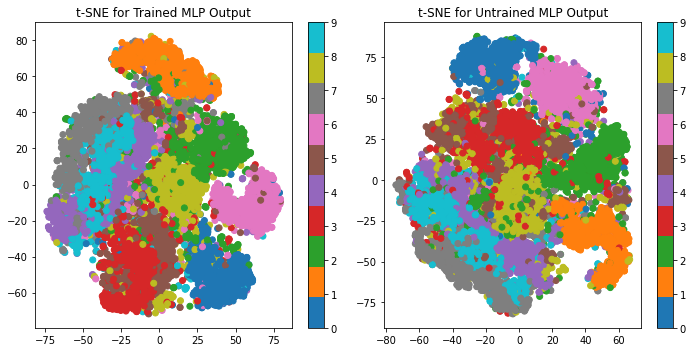

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the MLP model architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x

# Define the trained model
trained_model = MLP()

# Define a model that includes only the layers up to the desired layer
mlp_up_to_layer = nn.Sequential(*list(trained_model.children())[:2])

# Function to extract the output from a specific layer of the model
def extract_layer_output(model, input_data):
    return model(input_data)

# Extract output from the layer containing 20 neurons for the trained MLP model
with torch.no_grad():
    trained_mlp_output = extract_layer_output(mlp_up_to_layer, x_test)

# Define an untrained MLP model
untrained_model = MLP()

# Define a model that includes only the layers up to the desired layer for the untrained model
untrained_up_to_layer = nn.Sequential(*list(untrained_model.children())[:2])

# Extract output from the same layer for the untrained MLP model
with torch.no_grad():
    untrained_mlp_output = extract_layer_output(untrained_up_to_layer, x_test)

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the trained MLP output
trained_mlp_tsne = tsne.fit_transform(trained_mlp_output)

# Fit and transform the output from the same layer of the untrained MLP model
untrained_mlp_tsne = tsne.fit_transform(untrained_mlp_output)

# Plot t-SNE for trained and untrained MLP output
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(trained_mlp_tsne[:, 0], trained_mlp_tsne[:, 1], c=y_test, cmap=plt.cm.tab10)
plt.title('t-SNE for Trained MLP Output')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(untrained_mlp_tsne[:, 0], untrained_mlp_tsne[:, 1], c=y_test, cmap=plt.cm.tab10)
plt.title('t-SNE for Untrained MLP Output')
plt.colorbar()

plt.tight_layout()
plt.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


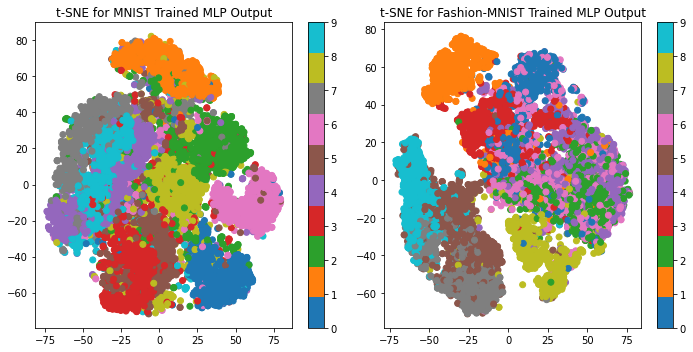

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Step 1: Load the Fashion-MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Step 2: Preprocess the Fashion-MNIST data
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

# Step 2: Preprocess the Fashion-MNIST data 
x_train_fashion=x_train_fashion.astype(np.float32)
x_test_fashion = x_test_fashion.astype(np.float32)
x_train_fashion = torch.tensor(x_train_fashion)
x_test_fashion = torch.tensor(x_test_fashion)
y_train_fashion = torch.tensor(y_train_fashion)
y_test_fashion = torch.tensor(y_test_fashion)

# Step 3: Use the trained MLP model to predict on Fashion-MNIST dataset
mlp_up_to_layer = nn.Sequential(*list(trained_model.children())[:2])
mlp_up_to_layer.eval()  # Set the model to evaluation mode

# Function to extract the output from a specific layer of the model
def extract_layer_output(model, input_data):
    with torch.no_grad():
        return model(input_data)

# Extract output from the layer containing 20 neurons for the Fashion-MNIST dataset
fashion_mnist_output = extract_layer_output(mlp_up_to_layer, x_test_fashion)

# Step 4: Apply t-SNE to reduce the dimensionality to 2D for both MNIST and Fashion-MNIST
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the output from the layer containing 20 neurons for both datasets
mnist_mlp_tsne = tsne.fit_transform(trained_mlp_output)
fashion_mnist_tsne = tsne.fit_transform(fashion_mnist_output.numpy())  # Convert to numpy array for compatibility with TSNE

# Step 5: Plot t-SNE for both MNIST and Fashion-MNIST
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(mnist_mlp_tsne[:, 0], mnist_mlp_tsne[:, 1], c=y_test, cmap=plt.cm.tab10)
plt.title('t-SNE for MNIST Trained MLP Output')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(fashion_mnist_tsne[:, 0], fashion_mnist_tsne[:, 1], c=y_test_fashion, cmap=plt.cm.tab10)
plt.title('t-SNE for Fashion-MNIST Trained MLP Output')
plt.colorbar()

plt.tight_layout()
plt.show()
